<a href="https://colab.research.google.com/github/17092003vamsi/213ECE3317/blob/main/RNNcode2_9_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import seaborn as sns
import matplotlib.pyplot as plt


In [14]:
file_path = '/content/COMPLETE DATA SET 2 (1).csv'
data = pd.read_csv(file_path)
X = data.iloc[:, :-2]  # Features - exclude 'Type' and 'Label' columns
y = data.iloc[:, -1].values   # Labels - the last column
# Inspect the first few rows of the dataset
print(data.head())

# Check the data types and see if there are any missing values
print(data.info())

print(f"Data shape: {X.shape}")
print(f"Labels shape: {y.shape}")

           0          1          2          3          4          5  \
0  38.274353  38.274353  38.274353  38.274353  38.274353  38.274353   
1  60.743327  58.374448  52.307200  43.167179  37.306176  39.377123   
2  35.598535  30.805204  25.624235  21.627399  19.019032  18.516897   
3  25.595452  23.208748  22.575827  22.156338  20.145037  15.588119   
4  38.042662  42.871367  42.081415  35.981881  28.191039  18.636240   

           6          7          8          9  ...      2082      2083  \
0  38.274353  38.274353  38.274353  38.274353  ...  0.000068  0.000044   
1  33.675893  23.270452  26.359007  29.186764  ...  0.000149  0.000099   
2  16.391426  14.156888  16.742159  18.522038  ...  0.000105  0.000079   
3  12.127479  11.763777  12.586168  11.047582  ...  0.000061  0.000039   
4  13.543053  13.268878  13.004368  16.247301  ...  0.000162  0.000124   

       2084      2085      2086      2087      2088      2089  Type  Label  
0  0.000020 -0.000005 -0.000029 -0.000053 -0.000077

In [15]:
print(data.dtypes)

print(data.isnull().sum())


0        float64
1        float64
2        float64
3        float64
4        float64
          ...   
2087     float64
2088     float64
2089     float64
Type      object
Label     object
Length: 2092, dtype: object
0        0
1        0
2        0
3        0
4        0
        ..
2087     0
2088     0
2089     0
Type     0
Label    0
Length: 2092, dtype: int64


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Assuming the last column is the label and the others are features
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Labels

# Encode labels (if they are categorical)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Reshape X if necessary (e.g., to 2D or 3D for CNN input)
# Assuming each sample is a signal that needs to be reshaped for CNN
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("Training data shape:", y_train.shape)
print("Test data shape:", y_test.shape)

Training data shape: (245, 2091, 1)
Test data shape: (62, 2091, 1)
Training data shape: (245,)
Test data shape: (62,)


In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build the CNN model
model = models.Sequential([
    layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),

    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),

    layers.Conv1D(128, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Loss function for binary classification
              metrics=['accuracy'])

# Print model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 2089, 32)            │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 1044, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 1042, 64)            │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 521, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 519, 128)            │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 259, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 33152)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       4,243,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,274,753 (16.31 MB)

 Trainable params: 4,274,753 (16.31 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

# Assuming 'data' is your pandas DataFrame
X = data.iloc[:, :-1]  # Features - exclude the last column

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Convert X to a pandas DataFrame if it's not already
if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X)

non_numeric_cols = X.select_dtypes(exclude=['number']).columns
X = pd.get_dummies(X, columns=non_numeric_cols)

X = X.values
X = X.reshape((X.shape[0], X.shape[1], 1))
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Define the LSTM model
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.LSTM(50, return_sequences=False),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Use sigmoid for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
# Convert the data to the correct data type
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_val = X_val.astype('float32')
y_val = y_val.astype('float32')

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.4491 - loss: 0.6934 - val_accuracy: 0.5161 - val_loss: 0.6930
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.5413 - loss: 0.6928 - val_accuracy: 0.5161 - val_loss: 0.6927
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.4805 - loss: 0.6945 - val_accuracy: 0.5161 - val_loss: 0.6929
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.5230 - loss: 0.6927 - val_accuracy: 0.5161 - val_loss: 0.6929
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.4964 - loss: 0.6933 - val_accuracy: 0.5161 - val_loss: 0.6929
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.5153 - loss: 0.6930 - val_accuracy: 0.5161 - val_loss: 0.6928
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.4812 - loss: 0.6939 - val_accuracy: 0.5161 - val_loss: 0.6929
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.4831 - loss: 0.6937 - val_accuracy: 0.5161 - val_loss: 0.6929
Epoch 9/

In [24]:
# Convert the data to the correct data type
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 418ms/step - accuracy: 0.5003 - loss: 0.6932
Test Accuracy: 51.61%


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 420ms/step
True Positives (TP): 0.00%
False Positives (FP): 0.00%
True Negatives (TN): 51.61%
False Negatives (FN): 48.39%


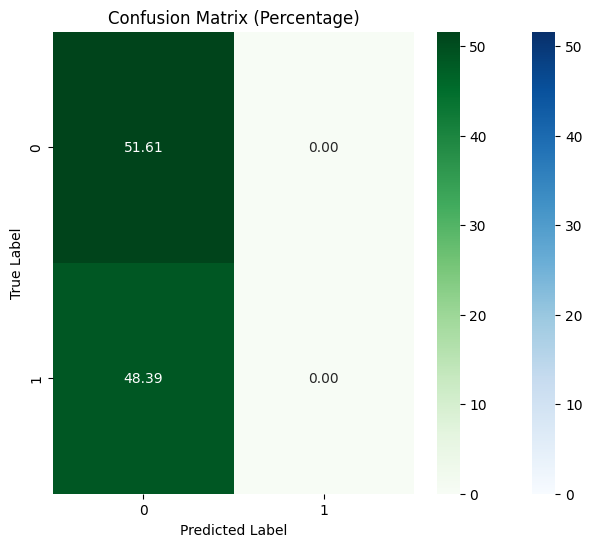

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the labels for the test set
y_pred = (model.predict(X_test) > 0.5).astype("int64")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the total number of samples in the test set
total_samples = cm.sum()

# Convert confusion matrix values to percentages
cm_percentage = (cm / total_samples) * 100

# Print the confusion matrix components as percentages
TP_percentage = cm_percentage[1, 1]
FP_percentage = cm_percentage[0, 1]
TN_percentage = cm_percentage[0, 0]
FN_percentage = cm_percentage[1, 0]

print(f"True Positives (TP): {TP_percentage:.2f}%")
print(f"False Positives (FP): {FP_percentage:.2f}%")
print(f"True Negatives (TN): {TN_percentage:.2f}%")
print(f"False Negatives (FN): {FN_percentage:.2f}%")

# Visualize the confusion matrix using a heatmap with percentages
plt.figure(figsize=(16, 6))

# Plot percentage heatmap
plt.subplot(1, 2, 1)
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
sns.heatmap(cm_percentage, annot=False, fmt=".2f", cmap="Greens", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Percentage)")
plt.show()


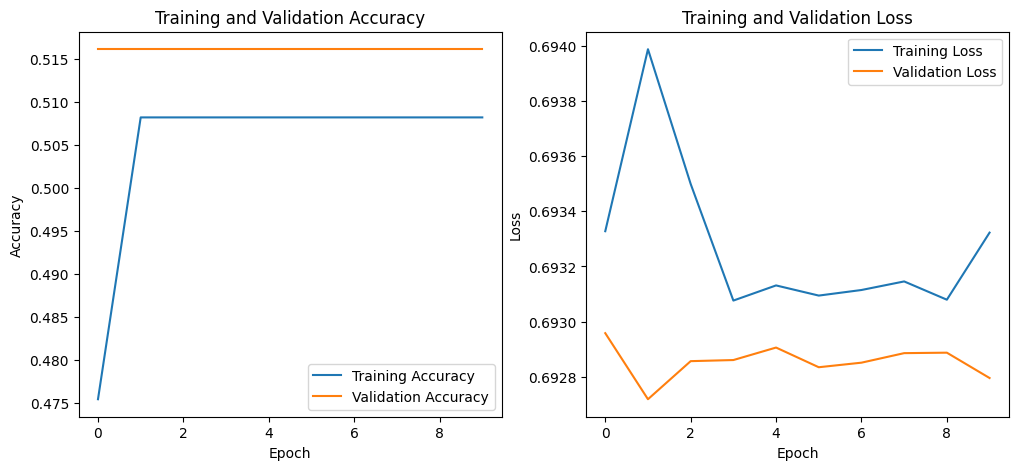

In [26]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
